# 딥러닝 모델 학습
---
## 손실 함수(Loss Function)
---
학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표  
모델이 훈련되는 동안 최소화될 값 : 주어진 문제의 성공 지표  
손실 함수 결과를 통해 파라미터를 조정하며 학습 진행  
최적화 이론에서 최소화 하고자 하는 함수 : 미분 가능한 함수 사용  

#### Keras에서 제공되는 주요 손실 함수
- sparse_categorical_crossentropy : 클래스가 배타적 방식으로 구분되어 있을 때(0, 1, 2, ... , 9) 사용
- categorycal_cross_entropy : 클래스가 원-핫 인코딩(one-hot encoding) 방식으로 되어 있을 때 사용
- binary_crossentropy : 이진 분류를 수행할 때 사용

### 평균 절대 오차 (Mean Absolute Error, MAE)
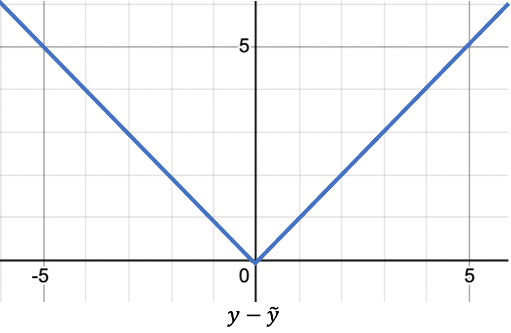
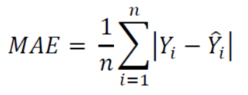

오차가 커져도 손실함수가 일정하게 증가  
이상치(Outlier)에 강건한(Robust) 특성  
데이터에서 [입력-정답]관계가 적절하지 않은 것이 있을 경우에, 좋은 추정을 하더라도 오차가 발생하는 경우가 발생하는데, 이상치에 해당하는 지점에서 손실 함수의 최소값으로 가는 정도의 영향력이 크지 않은 특성을 가지고 있음  
일반적으로 회귀(Regression)에 많이 사용하는 손실함수  

### 평군 제곱 오차 (Mean Squared Error, MSE)
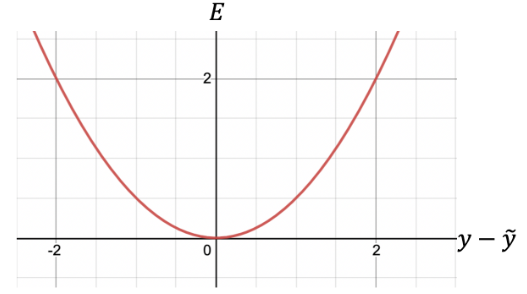
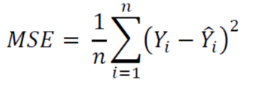

가장 많이 사용되는 손실 함수 중 하나  
오차가 커질수록 손실함수가 빠르게 증가하는 특성  
정답과 예측한 값의 차이가 클수록 더 많은 페널티를 부여하는 형태로 동작  
일반적으로 회귀(Regression)에 사용되는 손실함수  

#### 원-핫 인코딩 (One-Hot Encoding)
범주형 변수를 표현할 때 사용  
가변수(Dummy Variable)라고도 함  
정답인 레이블만 1이고 나머지는 0으로 처리하는 형태  

### 교차 엔트로피 오차 (Cross Entropy Error, CEE)
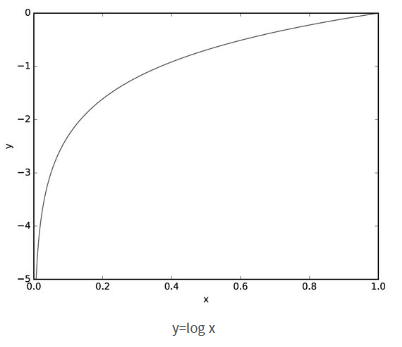
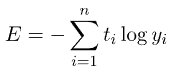

이진 분류(Binary Classification) 또는 다중 클래스 분류(Multi Class Classification)에 주로 사용  
오차는 소프트맥스(softmax) 결과와 원-핫 인코딩(one-hot encoding) 사이의 출력 간 거리를 비교  
정답을 맞추면 오차가 0, 틀리면 그 차이가 클수록 오차가 무한히 커지게 됨  
이진 분류 문제의 교차 엔트로피(Binary Cross Entropy, BCE)  

---
## 옵티마이저(Optimizer)와 지표
---
손실 함수를 기반으로 모델이 어떻게 업데이트되어야 하는지 결정

#### Keras에서 제공하는 옵티마이져 : 사용자가 특정 종류의 확률적 경사 하강법 지정 가능
- keras.optimizer.SGD() : 기본적인 확률적 경사 하강법  
- keras.optimizer.Adam() : 자주 사용되는 옵티마이저  
보통 옵티마이저의 튜닝을 위해 따로 객체를 생성하여 컴파일시에 포함  

### 경사하강법(Gradient Decent)
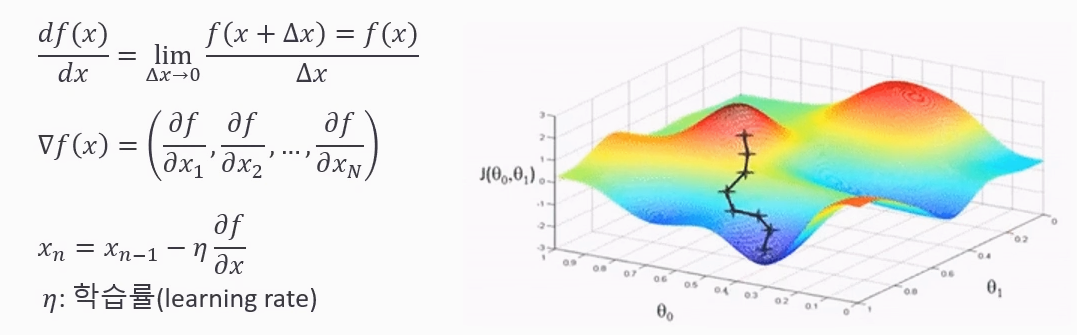

미분과 기울기로 동작, 스칼라를 벡터로 미분  
변화가 있는 지점에서는 미분값이 존재  
변화가 없는 지점은 미분값이 0  
미분값이 클수록 변화량이 큼  
한 스텝마다의 미분값에 따라 이동하는 방향을 결정  
f(x)값이 변하지 않으때까지 반복  

### 볼록함수(Convex Function)와 비볼록함수(Non-Convex Function)
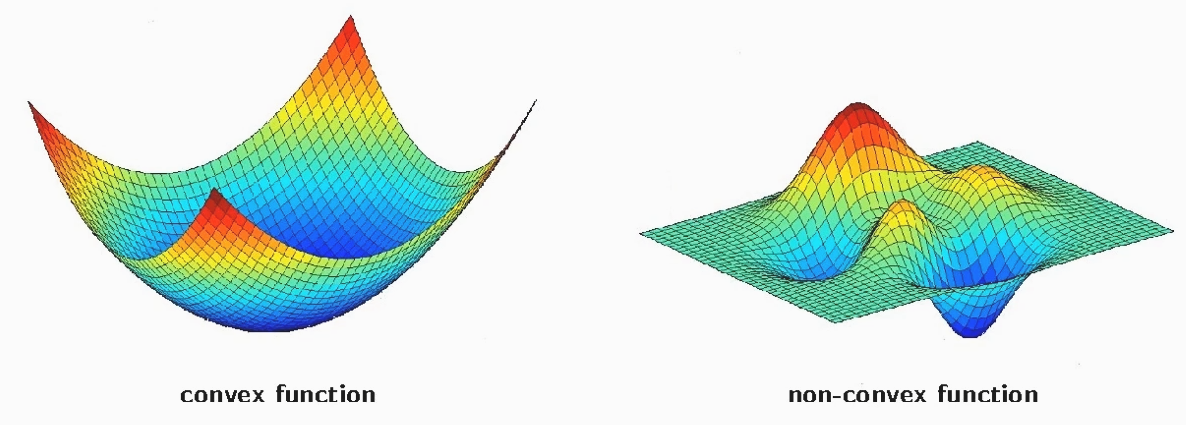

볼록함수 : 어떤 지점에서 시작하더라도 최적값(손실함수가 최소로 하는 점)에 도달 가능  
비볼록함수 : 시작점 위치에 따라 다른 최적값에 도달할 수 있음  

### 안장점(Saddle Point)
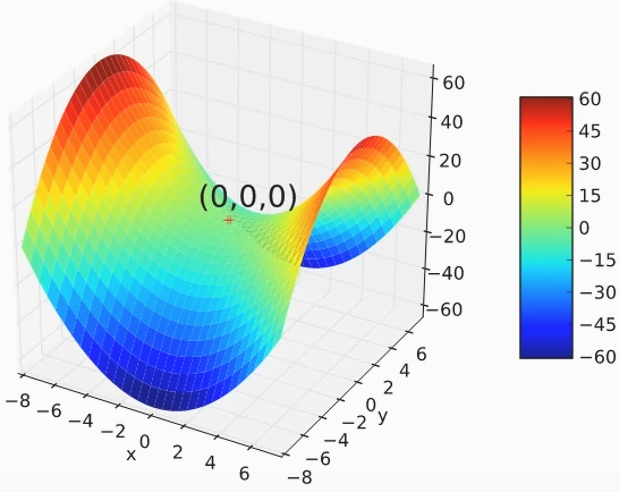

기울기가 0이지만 극값이 되지 않는 점  
경사하강법은 안장점에서 벗어나지 못하는 문제가 있음  

### 학습률(Learning Rate)
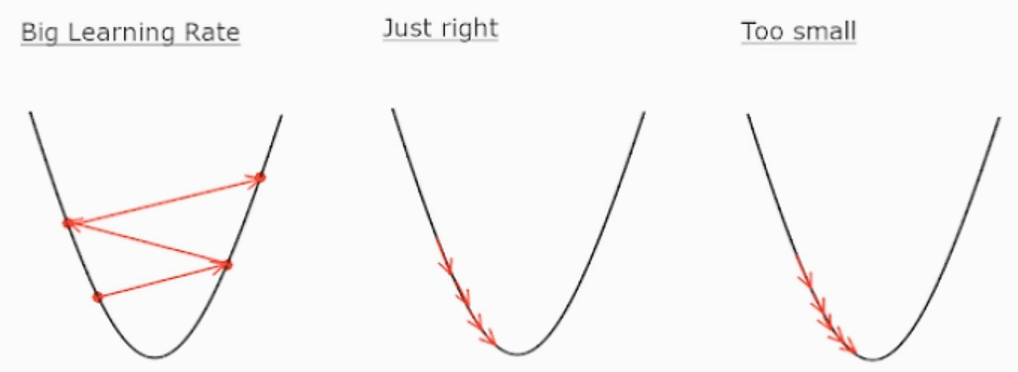

모델을 학습하기 우해서는 적절한 학습률을 지정해야 최저점에 잘 도달할 수 있음  
학습률이 너무 크면 발산하고, 너무 작으면 학습이 오래 걸리거나 최저점에 도달하지 못하는 문제가 있음  

### 지표(Metrics)
딥러닝 학습 시 필요한 다양한 지표들을 지정 가능  
일반저긍로 'mae'나 'accuracy'를 사용  
'accuracy' 같은 경우 줄여서 'acc'로도 사용이 가능  
Keras에서 사용되는 지표 종류  

---
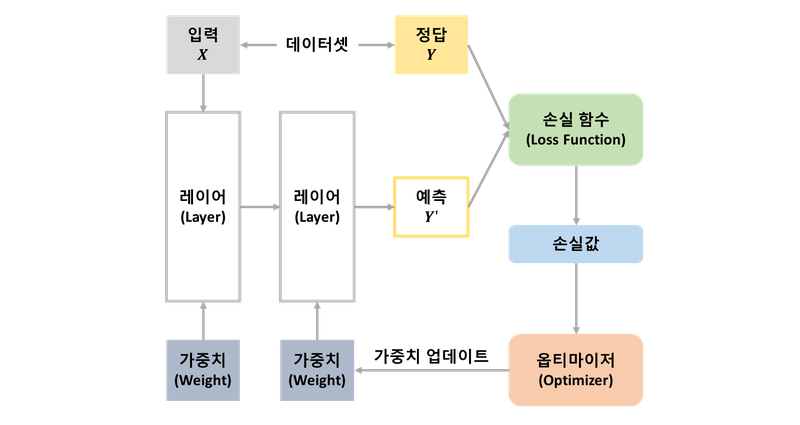  
1. 데이터셋을 입력 X와 실제 정답(레이블)인 Y로 구분
2. 입력 데이터는 연속된 레이어로 구성된 네트워크(모델)를 통해 결과로 예측 Y'을 출력합니다.
3. 손실 함수는 모델이 예측한 Y'과 실제 정답인 Y와 비교하여 얼마나 차이가 나는지 측정하는 손실 값을 계산
4. 옵티마이저는 손실 값을 사용하여 모델의 가중치를 업데이트하는 과정을 수행
5. 모델이 새롭게 예측한 Y'과 실제 정답인 Y의 차이를 측정하는 손실 값을 계산하는 과정을 반복  

계산한 손실값을 최소화하도록 옵티마이저가 동작하는 것

---
## 선형회귀(Linear Regression)를 위한 딥러닝 모델
---
### 데이터 생성
데이터셋을 make_regression 함수를 이용  

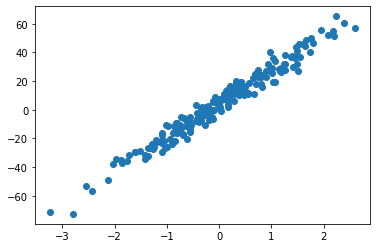

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

'''
샘플 갯수(n_samples) 200개
특징 갯수(n_featrues) 1개
바이어스(bias) 5.0 지정
노이즈(noise)는 5.0 지정
random_state는 123으로 하여 랜덤 시드 지정
'''
X, y = make_regression(n_samples=200, n_features=1, 
                       bias=5.0, noise=5.0, random_state=123)
y = np.expand_dims(y, axis=1)

plt.scatter(X, y)
plt.show()

학습용 데이터셋(x_train, y_train), 테스트용 데이터셋(x_test, y_test)으로 구분

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    random_state=123)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(160, 1) (160, 1)
(40, 1) (40, 1)


### 모델 생성

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


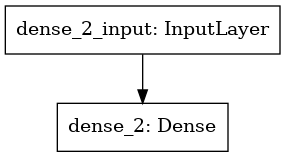

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, utils

# 모델은 간단하게 Sequential()을 이용해 선언
model = keras.Sequential()

'''
Dense 레이어 추가
- 유닛수는 1개
- activation은 선형 회귀('linear')로 지정
- input_shape은 (1,) : 1차원 입력 모양
'''
model.add(layers.Dense(1, activation='linear', input_shape=(1,)))

# 최종 모델의 구조를 summary() 함수를 통해 확인
model.summary()

# 모델 구조 시각화
utils.plot_model(model)

### 모델 함수

In [13]:
# 모델 컴파일 : compile()
'''
- 손실 함수(loss) : mse(Mean Square Error)
- 옵티마이저(optimizer) :  SGD(Stochastic Gradient Descent)
- 지표(metrics) : mae(Mean Absolute Error) mse(Mean Square Error)

'''
optimizer = optimizers.SGD()
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

# 모델 학습 진행 : fit()
'''
- x_train, y_train 지정
- 학습 반복 횟수(epochs) : 40
'''
history = model.fit(x_train, y_train, epochs=40)

Epoch 1/40
5/5 [==============================] - 0s 3ms/step - loss: 530.5420 - mae: 18.5122 - mse: 530.5420
Epoch 2/40
5/5 [==============================] - 0s 3ms/step - loss: 426.6454 - mae: 16.5783 - mse: 426.6454
Epoch 3/40
5/5 [==============================] - 0s 2ms/step - loss: 344.3651 - mae: 14.9311 - mse: 344.3651
Epoch 4/40
5/5 [==============================] - 0s 2ms/step - loss: 278.3773 - mae: 13.4300 - mse: 278.3773
Epoch 5/40
5/5 [==============================] - 0s 2ms/step - loss: 225.9886 - mae: 12.0442 - mse: 225.9886
Epoch 6/40
5/5 [==============================] - 0s 2ms/step - loss: 184.1003 - mae: 10.8894 - mse: 184.1003
Epoch 7/40
5/5 [==============================] - 0s 2ms/step - loss: 150.9145 - mae: 9.8673 - mse: 150.9145
Epoch 8/40
5/5 [==============================] - 0s 2ms/step - loss: 124.3325 - mae: 8.9600 - mse: 124.3325
Epoch 9/40
5/5 [==============================] - 0s 2ms/step - loss: 103.3509 - mae: 8.1562 - mse: 103.3509
Epoch 10/40
5

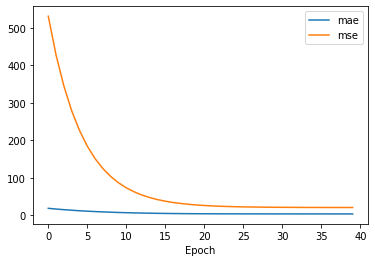

In [14]:
# 시각화 확인
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.xlabel('Epoch')
plt.legend(['mae', 'mse'])
plt.show();

### 모델 평가

In [15]:
# evaluate() 함수를 이용하여 데이터셋인 x_test, y_test에 대해서 지표인 mae와 mse를 확인
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 21.8856 - mae: 3.9858 - mse: 21.8856


[21.88555335998535, 3.9858310222625732, 21.88555335998535]

### 모델 예측 

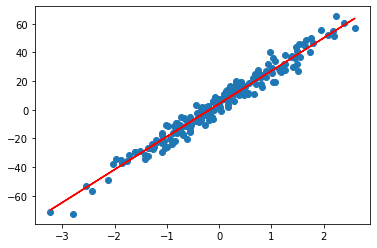

In [16]:
# predict() 학습된 모델을 통해 입력 데이터 X에 대한 예측값을 결과로 받아옵니다.
# 실제 데이터의 결과값 y와 모델의 예측 결과인 result를 살펴봅니다.
result = model.predict(X)
plt.scatter(X, y)
plt.plot(X, result, 'r')
plt.show()

In [17]:
# layers : 딥러닝 모델에서 사용한 레이어 확인
model.layers

In [19]:
# layer.name : 레이어 이름 확인
layer = model.layers[0]
print(layer.name)

# get_layer() 함수 : 레이어 이름으로 가져오기
layer = model.get_layer('dense_2')
print(layer.name)

dense_2
dense_2


In [20]:
'''
get_weights() 함수 : 레이어에서 사용하는 가중치(weights)와 바이어스(biases) 가져오기
레이어에 있는 가중치와 바이어스를 통해 선형 회귀식을 얻을 수 있습니다.
'''
weights, biases = layer.get_weights()
print(weights)
print(biases)

[[22.923307]]
[4.178012]


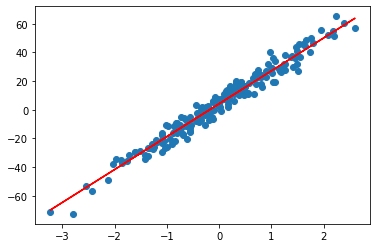

In [21]:
# 가중치(weights)와 바이어스(biases)를 통해 선형회귀식을 np.array(weights * X + biases)로 표현
plt.scatter(X, y)
plt.plot(X, np.array(weights * X + biases), 'r')
plt.show()